# Multivariate Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('fuel-econ.csv')

In [3]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
sedan_classes = ["Minicompact Cars","Subcompact Cars","Compact Cars", "Midsize Cars","Large Cars"]
vlasses=pd.api.types.CategoricalDtype(ordered=True, categories= sedan_classes)
df.VClass=df.VClass.astype(vlasses)

df['trans_type']=df.trans.apply(lambda x : x.split()[0])

In [5]:
df.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic


In [6]:
np.random.seed(2018)
sample=np.random.choice(df.shape[0], 200, replace=False)
df_subset=df.loc[sample]#200 random samples

In [7]:
df_subset.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic


## Size and Shape

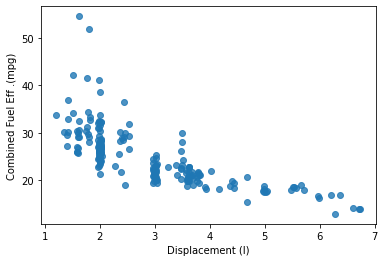

In [8]:
sns.regplot(data=df_subset, x="displ", y="comb", x_jitter=0.04, fit_reg=False)
plt.xlabel("Displacement (l)")
plt.ylabel('Combined Fuel Eff .(mpg)');

In [9]:
df.shape

(3929, 21)

### Shape

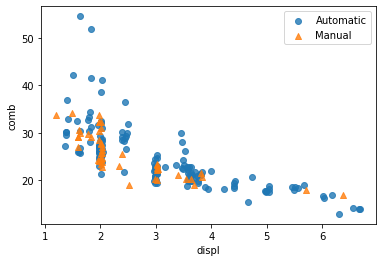

In [10]:
#we want to add up another variable to the plot
#a categorical variable and we are going to use shape

ttype_markers =[['Automatic','o'],
               ['Manual','^']]

for ttype, marker in ttype_markers:
    plot_data=df_subset.loc[df_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x="displ", y="comb", x_jitter=0.04, fit_reg=False, marker=marker);
    
plt.legend(['Automatic','Manual']);

In [11]:
plot_data.shape

(48, 21)

In [12]:
df_subset.trans_type.value_counts()

Automatic    152
Manual        48
Name: trans_type, dtype: int64

### Size

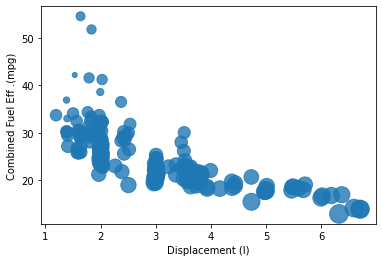

In [13]:
sns.regplot(data=df_subset, x="displ", y="comb", x_jitter=0.04, fit_reg=False, scatter_kws={'s': df_subset.co2/2}) #to reduce marker size
plt.xlabel("Displacement (l)")
plt.ylabel('Combined Fuel Eff .(mpg)');

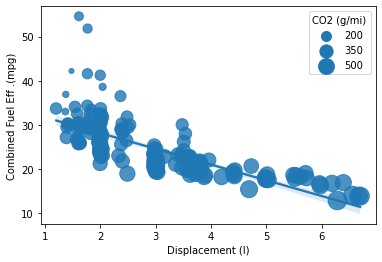

In [14]:
sns.regplot(data=df_subset, x="displ", y="comb", x_jitter=0.04, fit_reg=True, scatter_kws={'s': df_subset.co2/2}) #to reduce marker size
plt.xlabel("Displacement (l)")
plt.ylabel('Combined Fuel Eff .(mpg)');

sizes=[200,350,500]
legend_obj=[]
base_color=sns.color_palette()[0]

for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/2, color=base_color))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

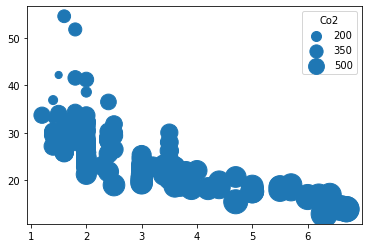

In [15]:
plt.scatter(data=df_subset, x="displ", y="comb", s="co2");

sizes=[200,350,500]
legend_obj=[]
base_color=sns.color_palette()[0]

for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/2, color=base_color))
plt.legend(legend_obj,sizes,title="Co2");

## Color

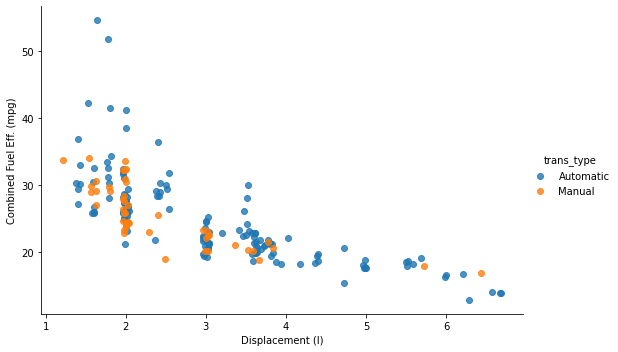

In [16]:
g=sns.FacetGrid(data=df_subset, hue="trans_type", height=5, aspect=1.5, hue_order=['Automatic','Manual'])
g.map(sns.regplot, 'displ','comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

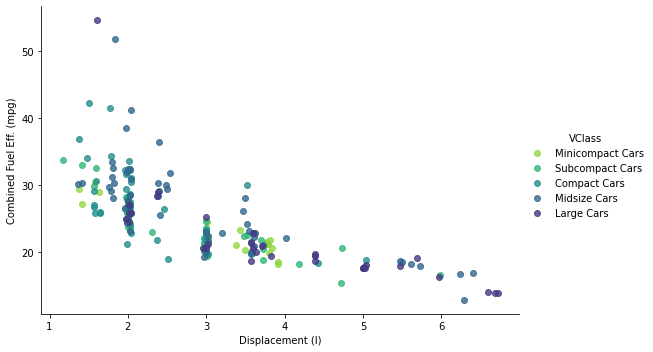

In [17]:
g=sns.FacetGrid(data=df_subset, hue="VClass", height=5, aspect=1.5, palette='viridis_r')
g.map(sns.regplot, 'displ','comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

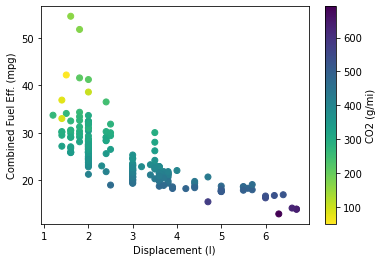

In [18]:
#for 3 numerical variables we just use the scatter method
plt.scatter(data=df_subset, x="displ", y="comb", c="co2", cmap="viridis_r")
plt.colorbar(label="CO2 (g/mi)")
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

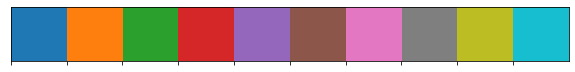

In [19]:
#qualitative palette
sns.palplot(sns.color_palette())

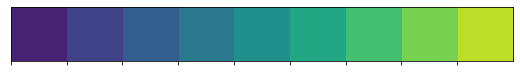

In [20]:
#sequencial palette
sns.palplot(sns.color_palette('viridis',9))

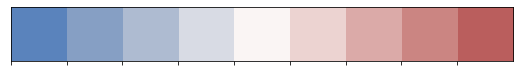

In [21]:
#diverging palette
sns.palplot(sns.color_palette('vlag',9))

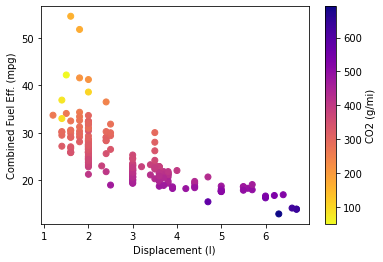

In [22]:
plt.scatter(data=df_subset, x="displ", y="comb", c="co2",cmap="plasma_r")
plt.colorbar(label="CO2 (g/mi)")
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

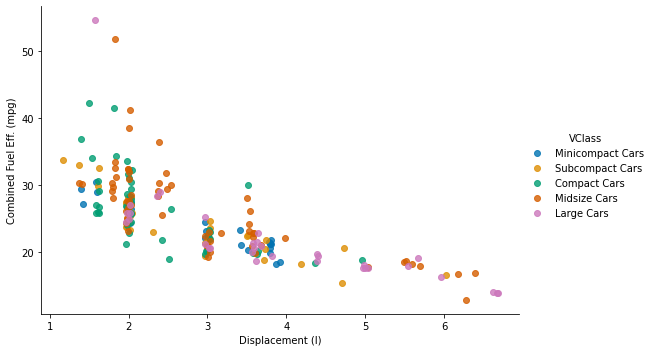

In [23]:
g=sns.FacetGrid(data=df_subset, hue="VClass", height=5, aspect=1.5, palette='colorblind')
g.map(sns.regplot, 'displ','comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

### Practice

In [24]:
pokemon=pd.read_csv('pokemon.csv')

In [25]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

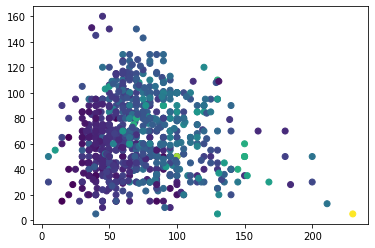

In [26]:
plt.scatter(data=pokemon, x="defense", y="speed", c="special-defense");

In [27]:
np.random.seed(2018)
sample=np.random.choice(pokemon.shape[0],100, replace=False)
pokemon_sample=pokemon.loc[sample]

In [28]:
pokemon_sample.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
796,797,celesteela,7,9.2,999.9,257,steel,flying,97,101,103,61,107,101
800,801,magearna,7,1.0,80.5,270,steel,fairy,80,95,115,65,130,115
680,681,aegislash,6,1.7,53.0,234,steel,ghost,60,50,150,60,50,150
575,576,gothitelle,5,1.5,44.0,221,psychic,NaN,70,55,95,65,95,110
169,170,chinchou,2,0.5,12.0,66,water,electric,75,38,38,67,56,56


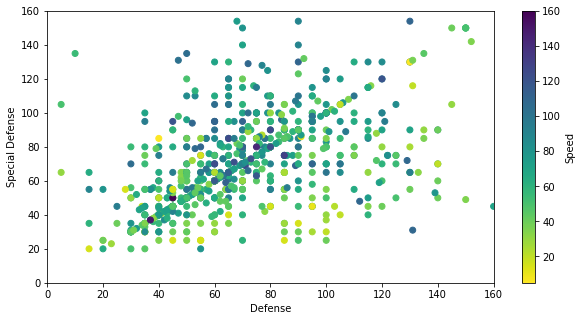

In [29]:
plt.figure(figsize=[10,5])
plt.scatter(data=pokemon, x="defense", y="special-defense", c="speed", cmap='viridis_r')
plt.colorbar(label="Speed")
plt.xlim(0,160)
plt.ylim(0,160)
plt.xlabel('Defense')
plt.ylabel('Special Defense');

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [30]:
type_cols=['type_1','type_2']

In [31]:
non_type_cols=pokemon.columns.difference(type_cols)

In [32]:
pokemon_types=pokemon.melt(id_vars=non_type_cols, value_vars=type_cols, var_name='type_level', value_name='type').dropna()

In [33]:
pokemon_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. Hint: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its .set() method will be vital for adjusting the axis scaling and tick marks. Check the last example in the Seaborn documentation for an example of how the .set() method is used, and the matplotlib documentation of the Axes class for properties that you might want to set.

In [34]:
pokemon_types.type.value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [35]:
pokemon_WH=pokemon_types.loc[pokemon_types['type'].isin(['dragon','fairy'])]

In [36]:
pokemon_WH.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


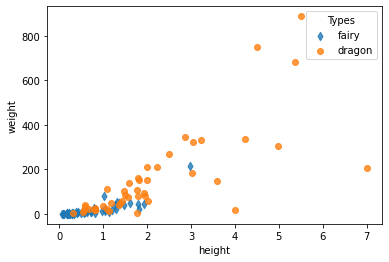

In [37]:
#shapes method
pokemon_plotshapes=[['fairy','d'],['dragon','o']]

for pokemontype, marker in pokemon_plotshapes:
    plot_data=pokemon_WH.loc[pokemon_WH['type'] == pokemontype]
    sns.regplot(data=plot_data, x="height", y="weight", x_jitter=0.04, marker=marker, fit_reg=False)  
plt.legend(['fairy','dragon'], title="Types");

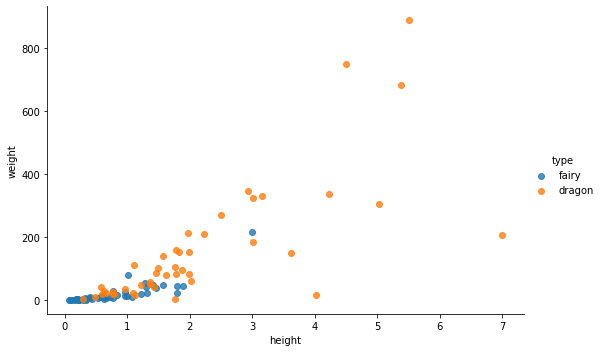

In [38]:
#color method
g=sns.FacetGrid(data=pokemon_WH, hue='type', height=5, aspect=1.5)
g.map(sns.regplot, 'height','weight', fit_reg=False, x_jitter = 0.04,)
g.add_legend();

## Faceting in Two Directions

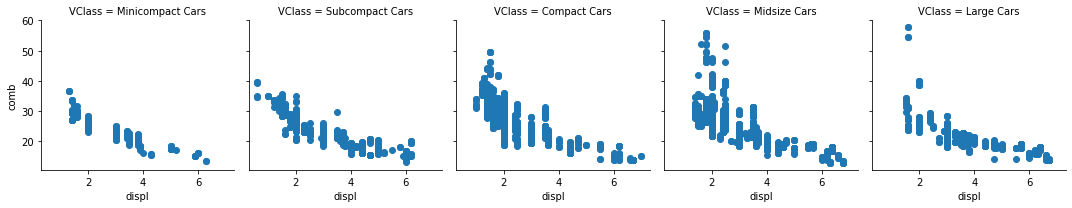

In [39]:
g=sns.FacetGrid(data=df, col='VClass')
g.map(plt.scatter, 'displ', 'comb');

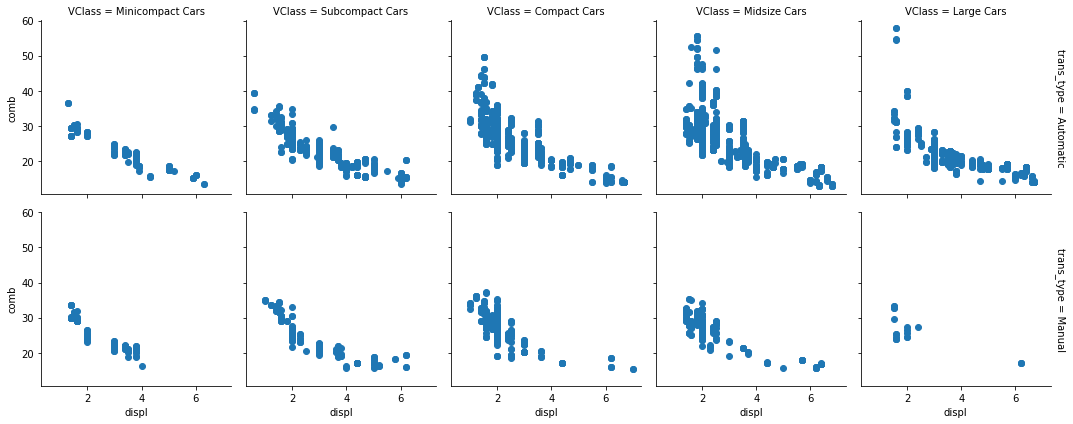

In [41]:
#we can add another value that is categorica
g=sns.FacetGrid(data=df, col='VClass', row='trans_type', margin_titles=True )
g.map(plt.scatter, 'displ', 'comb');

## Adaptation of Bivariate plots

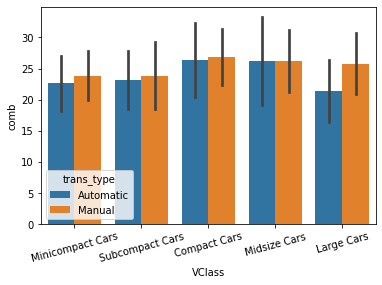

In [52]:
sns.barplot(data=df, x="VClass", y='comb', hue='trans_type', ci='sd');
plt.xticks(rotation=15);

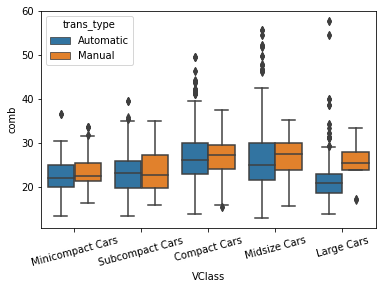

In [51]:
sns.boxplot(data=df, x="VClass", y='comb', hue='trans_type');
plt.xticks(rotation=15);

### Adapted Plot Practice

**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

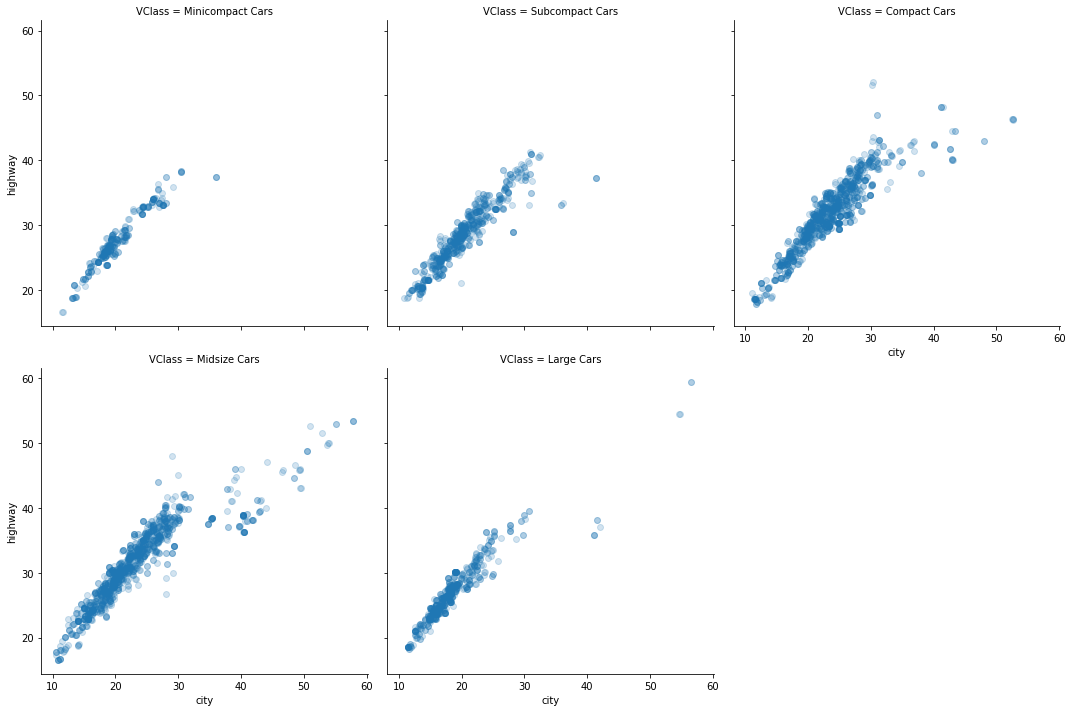

In [99]:
g=sns.FacetGrid(data=df, col='VClass', height=5, col_wrap=3)
g.map(sns.regplot, 'city', 'highway', fit_reg=False, x_jitter=0.04, scatter_kws={"alpha":0.2});

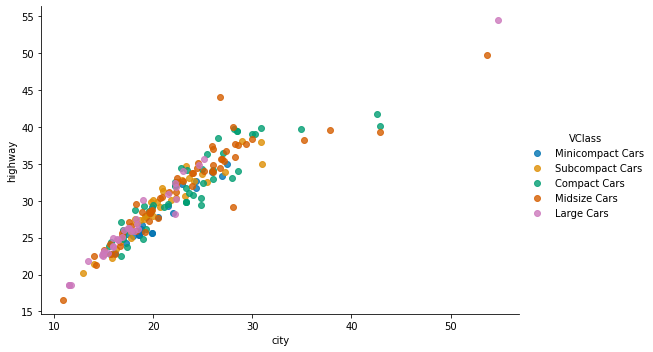

In [100]:
g=sns.FacetGrid(data=df_subset, hue="VClass", height=5, aspect=1.5, palette='colorblind')
g.map(sns.regplot, 'city','highway', x_jitter=0.04, fit_reg=False)
g.add_legend();

**Task 2**: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [101]:
df_fuled=df.loc[df['fuelType'].isin(['Premium Gasoline','Regular Gasoline'])]

In [103]:
df_fuled.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


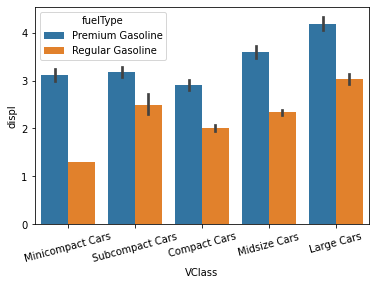

In [107]:
sns.barplot(data=df_fuled, x="VClass", y="displ", hue="fuelType");
plt.xticks(rotation=15);

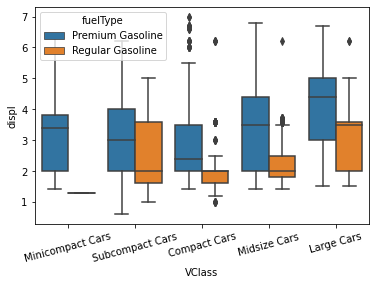

In [108]:
sns.boxplot(data=df_fuled, x="VClass", y="displ", hue="fuelType");
plt.xticks(rotation=15);

## Plot Matrices

In [109]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [112]:
pokmn_stats=pokemon.columns[8:]

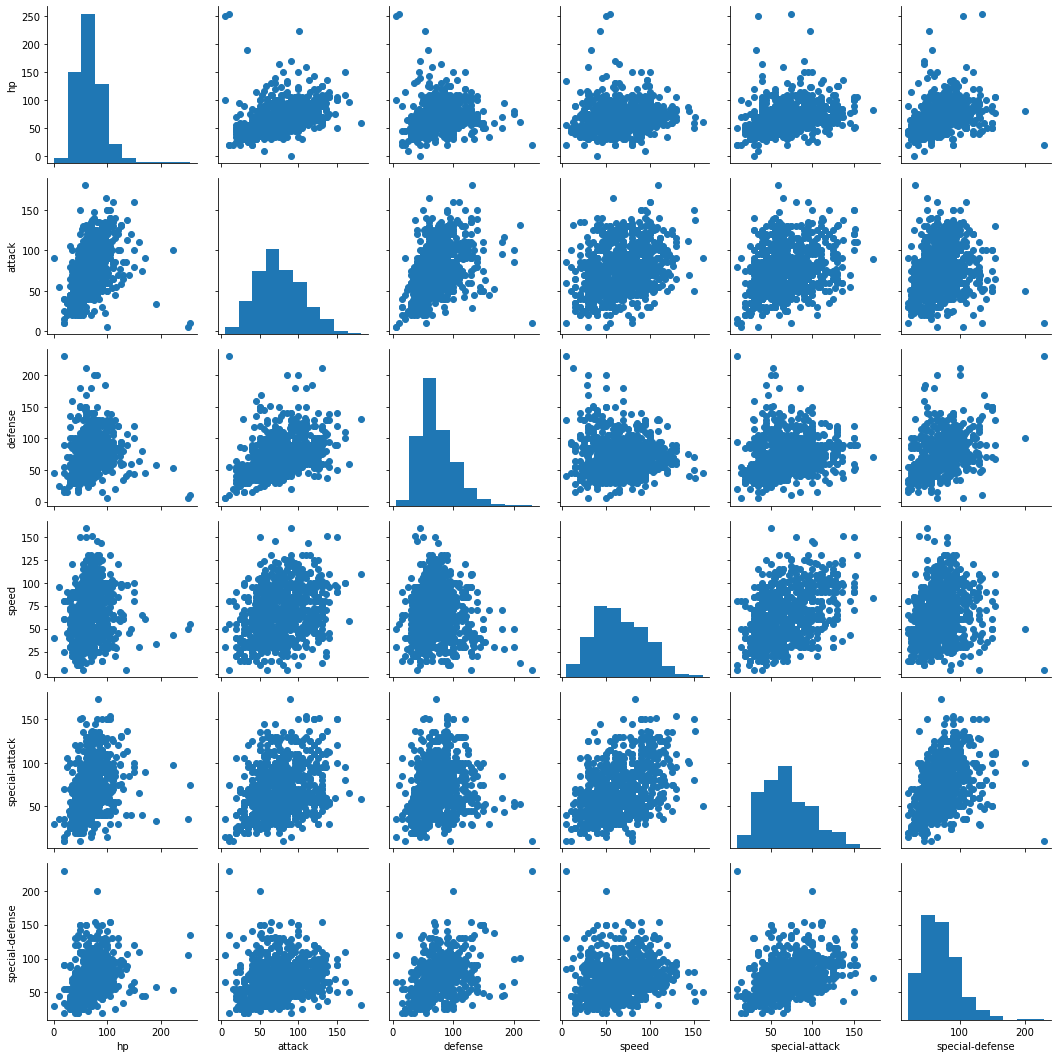

In [134]:
g=sns.PairGrid(data=pokemon, vars=pokmn_stats.values)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

In [119]:
pokemon[pokmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


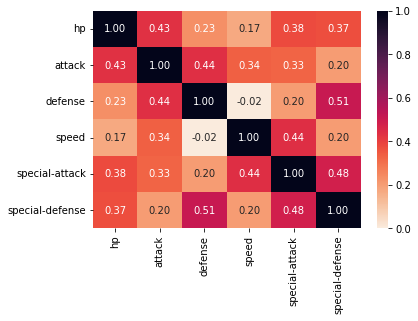

In [125]:
sns.heatmap(pokemon[pokmn_stats].corr(), annot=True, vmin=0, cmap='rocket_r', fmt= '.2f');

In [127]:
pokemon['special-defense'].describe()

count    807.000000
mean      70.013631
std       27.292344
min       20.000000
25%       50.000000
50%       65.000000
75%       85.000000
max      230.000000
Name: special-defense, dtype: float64

In [138]:
pokemon_WH.sample()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
1591,115,257,85,7,1.8,70,785,95,75,tapu-koko,130,20.5,type_2,fairy


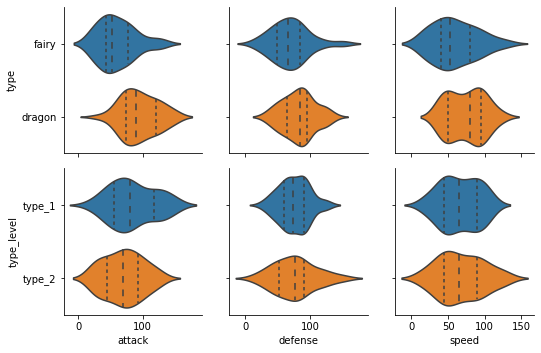

In [144]:
#lets have a PairGrid with caregorical and numerical variables
g=sns.PairGrid(data=pokemon_WH, x_vars=['attack','defense','speed'], y_vars=['type','type_level']);
g.map(sns.violinplot, inner ='quartile');

### Practice

Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

In [165]:
df_ful=df.loc[df['fuelType'].isin(['Premium Gasoline','Regular Gasoline','Diesel'])]

In [166]:
df_ful.fuelType.value_counts()

Premium Gasoline    2302
Regular Gasoline    1521
Diesel                80
Name: fuelType, dtype: int64

In [171]:
df_ful['C02_gallon'] = df_ful['co2'] * df_ful['comb']

C:\Users\DELL\AppData\Local\Temp\ipykernel_15320\276256280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ful['C02_gallon'] = df_ful['co2'] * df_ful['comb']


In [172]:
df_ful.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore', 'trans_type',
       'C02_gallon'],
      dtype='object')

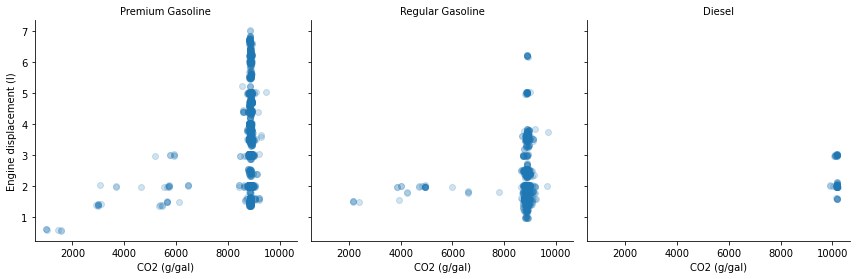

In [173]:
g = sns.FacetGrid(data = df_ful, col = 'fuelType', height = 4,col_wrap = 3)
g.map(sns.regplot, 'C02_gallon', 'displ', y_jitter = 0.04, fit_reg = False,
scatter_kws = {'alpha' : 1/5})
g.set_ylabels('Engine displacement (l)')
g.set_xlabels('CO2 (g/gal)')
g.set_titles('{col_name}');